Epoch 0: Loss = 1.1243
Epoch 1000: Loss = 0.0431
Epoch 2000: Loss = 0.0386
Epoch 3000: Loss = 0.0353
Epoch 4000: Loss = 0.0318
Epoch 5000: Loss = 0.0275
Epoch 6000: Loss = 0.0230
Epoch 7000: Loss = 0.0190
Epoch 8000: Loss = 0.0160
Epoch 9000: Loss = 0.0142


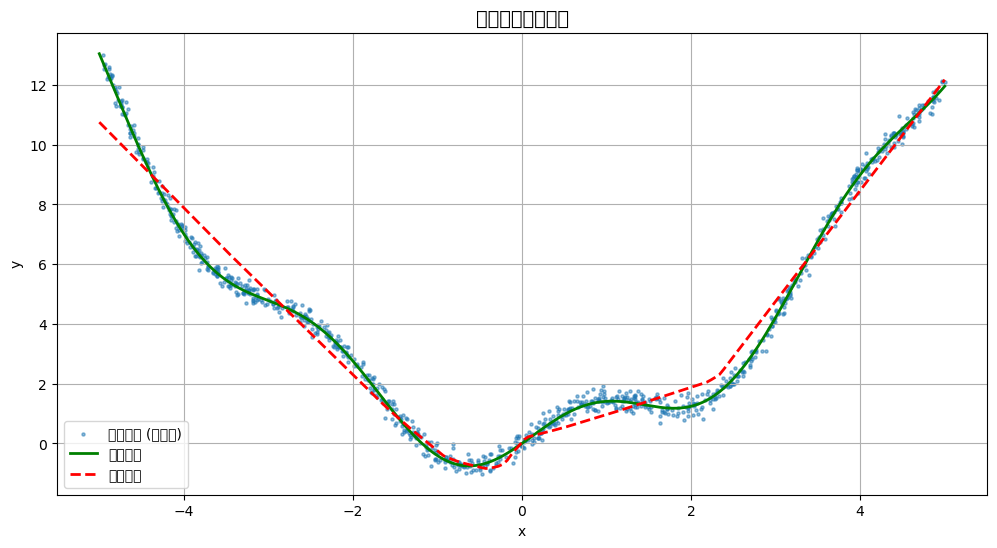

测试集 MSE: 0.3249
测试集 MAE: 0.4359


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 自定义目标函数
def target_function(x):
    """目标函数：组合正弦和二次函数"""
    return np.sin(2*x) + 0.5*x**2

# 2. 数据生成
np.random.seed(42)

# 生成训练数据 (带噪声)
x_train = np.random.uniform(-5, 5, size=(1000, 1))
y_train = target_function(x_train) + np.random.normal(0, 0.2, size=x_train.shape)

# 生成测试数据 (无噪声)
x_test = np.linspace(-5, 5, 200).reshape(-1, 1)
y_test = target_function(x_test)

# 数据标准化
x_mean, x_std = x_train.mean(), x_train.std()
y_mean, y_std = y_train.mean(), y_train.std()

x_train_norm = (x_train - x_mean)/x_std
y_train_norm = (y_train - y_mean)/y_std
x_test_norm = (x_test - x_mean)/x_std

# 3. 神经网络实现
class TwoLayerReLUNet:
    def __init__(self, input_size=1, hidden_size=128, output_size=1):
        # 参数初始化 (He初始化)
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2./input_size)
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2./hidden_size)
        self.b2 = np.zeros(output_size)
        
    def forward(self, x):
        # 前向传播
        self.x = x
        self.h1_pre = x @ self.W1 + self.b1
        self.h1 = np.maximum(0, self.h1_pre)  # ReLU激活
        self.y_pred = self.h1 @ self.W2 + self.b2
        return self.y_pred
    
    def backward(self, y_true, lr=0.001):
        # 反向传播
        m = len(y_true)
        
        # 输出层梯度
        dy = (self.y_pred - y_true)/m
        dW2 = self.h1.T @ dy
        db2 = np.sum(dy, axis=0)
        
        # 隐藏层梯度
        dh1 = dy @ self.W2.T
        dh1_pre = dh1 * (self.h1_pre > 0)  # ReLU导数
        dW1 = self.x.T @ dh1_pre
        db1 = np.sum(dh1_pre, axis=0)
        
        # 参数更新
        self.W2 -= lr * dW2
        self.b2 -= lr * db2
        self.W1 -= lr * dW1
        self.b1 -= lr * db1
        
        # 计算损失
        loss = 0.5 * np.mean((self.y_pred - y_true)**2)
        return loss

# 4. 模型训练
model = TwoLayerReLUNet()
loss_history = []

for epoch in range(10000):
    # 前向传播
    y_pred = model.forward(x_train_norm)
    
    # 反向传播和参数更新
    loss = model.backward(y_train_norm, lr=0.01)
    loss_history.append(loss)
    
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# 5. 预测和反标准化
y_pred_norm = model.forward(x_test_norm)
y_pred = y_pred_norm * y_std + y_mean

# 6. 可视化对比
plt.figure(figsize=(12,6))
plt.scatter(x_train, y_train, s=5, alpha=0.5, label='训练数据 (带噪声)')
plt.plot(x_test, y_test, 'g-', linewidth=2, label='真实函数')
plt.plot(x_test, y_pred, 'r--', linewidth=2, label='模型预测')
plt.title("函数拟合效果对比", fontsize=14)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# 7. 计算评价指标
mse = np.mean((y_pred - y_test)**2)
mae = np.mean(np.abs(y_pred - y_test))
print(f"测试集 MSE: {mse:.4f}")
print(f"测试集 MAE: {mae:.4f}")